## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Load the dataset

In [42]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# List of numerical columns
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:")
print(categorical_cols)
print("\nNumerical columns:")
print(numerical_cols)

Categorical columns:
['sex', 'smoker', 'day', 'time']

Numerical columns:
['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [4]:
average_bill_per_day = df.groupby('day')['total_bill'].mean()
print(average_bill_per_day)

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [5]:
average_tip_by_gender = df.groupby('sex')['tip'].mean()

more_generous_gender = average_tip_by_gender.max()

print(average_tip_by_gender)

print("\nGender more generous in giving tips:", more_generous_gender)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

Gender more generous in giving tips: 3.0896178343949043


### 4. According to the data, were there more customers for dinner or lunch?

In [6]:
customer_count_by_time = df['time'].value_counts()
print(customer_count_by_time)

time
Dinner    176
Lunch      68
Name: count, dtype: int64


### 5. Based on the statistical summary, comment on the variable 'tip'

In [7]:
tips_summary = df['tip'].describe()
print(tips_summary)

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


### 6. Find the busiest day in terms of the orders?

In [8]:
busiest_day = df['day'].value_counts()
print(busiest_day.idxmax())

Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

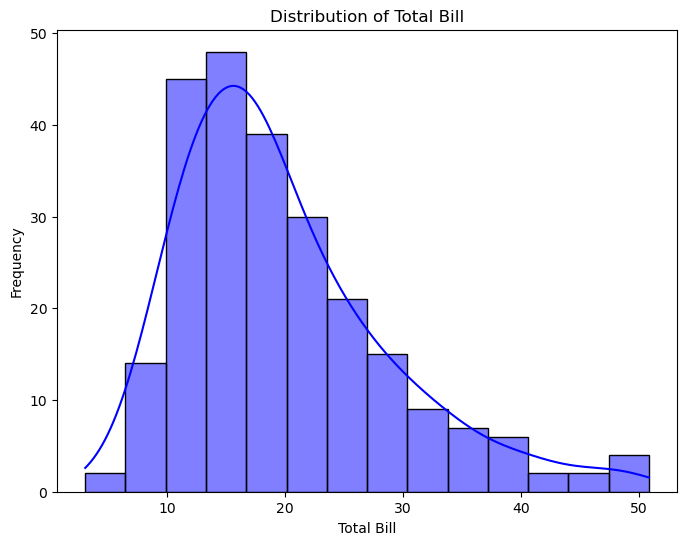

Skewness of the 'total_bill' variable: 1.1332130376158205
Type of skewness: right skewed


In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total_bill'], kde=True, color='blue')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

skewness = df['total_bill'].skew()

if skewness > 0:
    skew_type = 'right skewed'
elif skewness < 0:
    skew_type = 'left skewed'
else:
    skew_type = 'approximately symmetric'

print("Skewness of the 'total_bill' variable:", skewness)
print("Type of skewness:", skew_type)

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

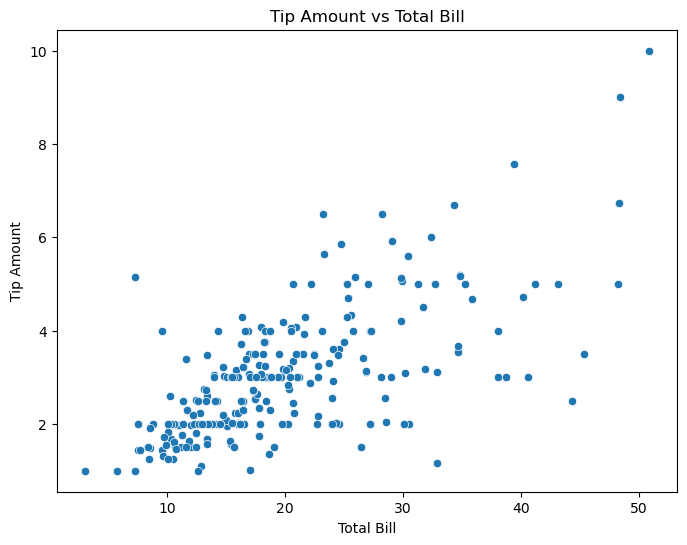

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Tip Amount vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

df[['tip', 'total_bill']].corr()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

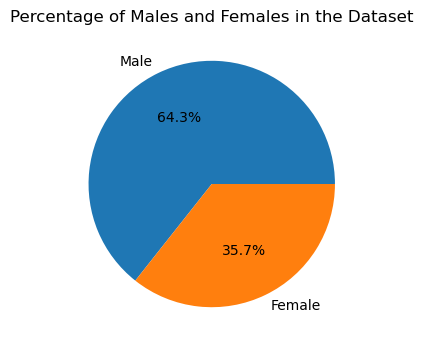

Percentage of males: 64.34426229508196
Percentage of females: 35.65573770491803


In [15]:
# Calculate the percentage of males and females
gender_counts = df['sex'].value_counts()
total_customers = gender_counts.sum()
percentage_male = (gender_counts['Male'] / total_customers) * 100
percentage_female = (gender_counts['Female'] / total_customers) * 100

# Plot the percentage of males and females
plt.figure(figsize=(8, 4))
plt.pie([percentage_male, percentage_female], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Percentage of Males and Females in the Dataset')
plt.show()

print("Percentage of males:", percentage_male)
print("Percentage of females:", percentage_female)

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

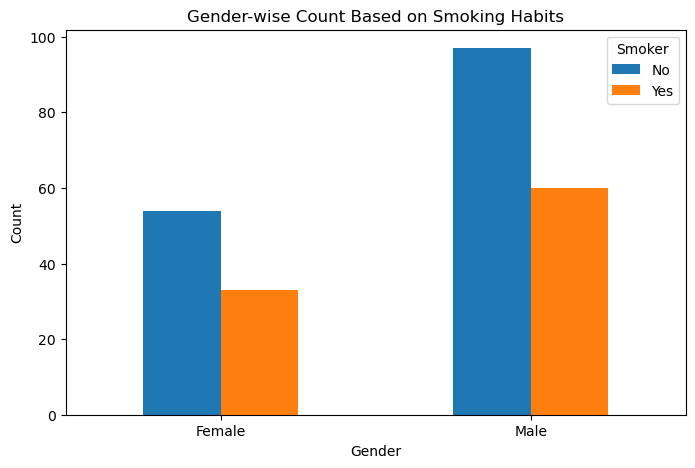

Gender-wise count based on smoking habits:
smoker  No  Yes
sex            
Female  54   33
Male    97   60


In [18]:
# Compute the gender-wise count based on smoking habits
gender_smoker_count = df.groupby(['sex', 'smoker']).size().unstack()

# Plot the gender-wise count based on smoking habits
gender_smoker_count.plot(kind='bar', figsize=(8, 5))
plt.title('Gender-wise Count Based on Smoking Habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Smoker', loc='upper right')
plt.show()

print("Gender-wise count based on smoking habits:")
print(gender_smoker_count)

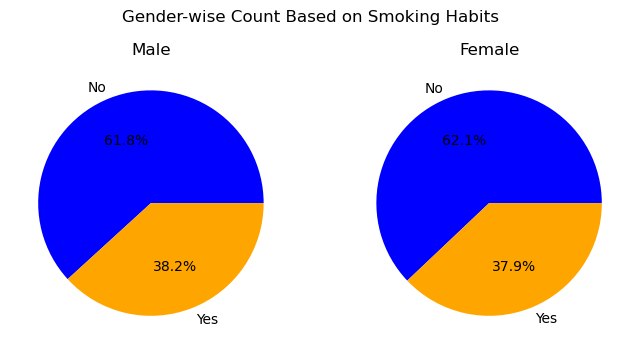

In [19]:
# Plot the gender-wise count based on smoking habits using a pie plot
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot for Male
ax[0].pie(gender_smoker_count.loc['Male'], labels=gender_smoker_count.columns, autopct='%1.1f%%', colors=['blue', 'orange'])
ax[0].set_title('Male')

# Plot for Female
ax[1].pie(gender_smoker_count.loc['Female'], labels=gender_smoker_count.columns, autopct='%1.1f%%', colors=['blue', 'orange'])
ax[1].set_title('Female')

fig.suptitle('Gender-wise Count Based on Smoking Habits')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

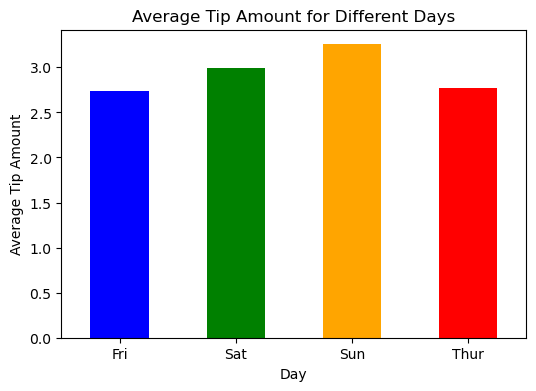

Average tip amount for different days:
day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


In [28]:
# Compute the average tip amount for different days
average_tip_per_day = df.groupby('day')['tip'].mean()

# Plot the average tip amount for different days
plt.figure(figsize=(6, 4))
colors = ['blue', 'green', 'orange', 'red']
average_tip_per_day.plot(kind='bar', color=colors)
plt.title('Average Tip Amount for Different Days')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.xticks(rotation=0)
plt.show()

print("Average tip amount for different days:")
print(average_tip_per_day)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

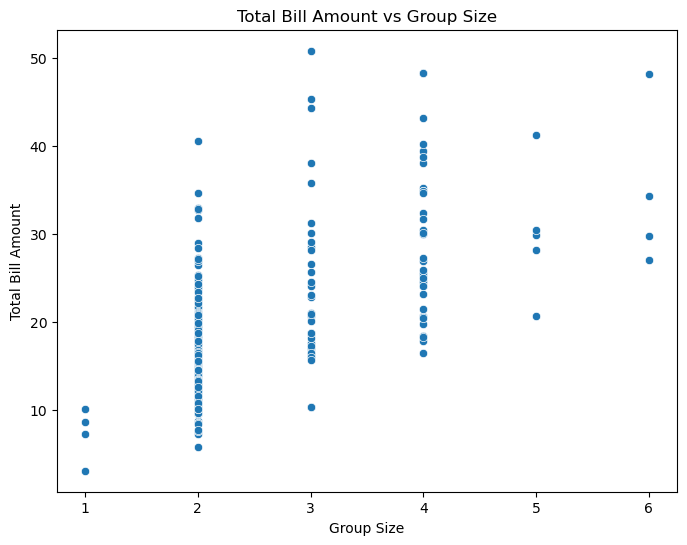

Correlation coefficient between 'size' and 'total_bill': 0.5983151309049022


In [29]:
# Plot a scatter plot of 'size' vs 'total_bill'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='size', y='total_bill', data=df)
plt.title('Total Bill Amount vs Group Size')
plt.xlabel('Group Size')
plt.ylabel('Total Bill Amount')
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df['size'].corr(df['total_bill'])

print("Correlation coefficient between 'size' and 'total_bill':", correlation_coefficient)

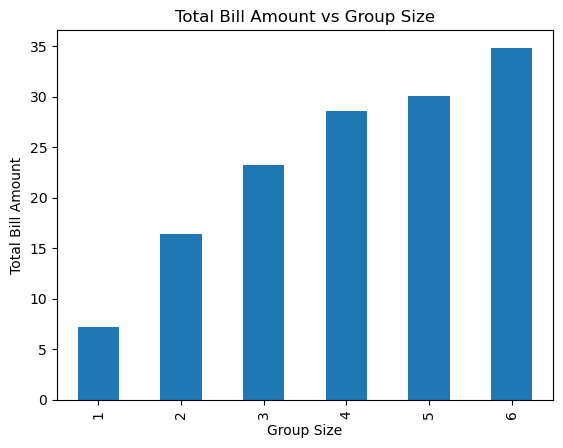

In [31]:
#using Bar plot

df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.title('Total Bill Amount vs Group Size')
plt.xlabel('Group Size')
plt.ylabel('Total Bill Amount')
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

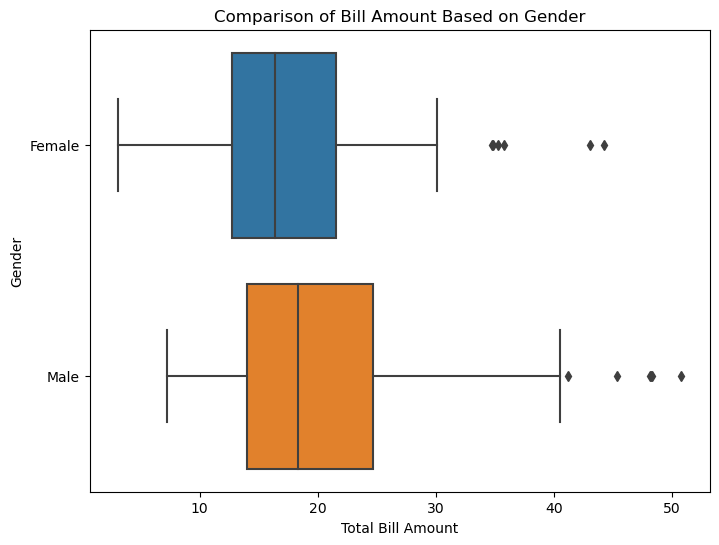

In [32]:
# Plot a horizontal boxplot to compare the bill amount based on gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_bill', y='sex', data=df, orient='h')
plt.title('Comparison of Bill Amount Based on Gender')
plt.xlabel('Total Bill Amount')
plt.ylabel('Gender')
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [33]:
df.groupby(['time', 'day'])['total_bill'].max()

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [34]:

# Compute the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in the dataset:")
print(missing_percentage)

Percentage of missing values in the dataset:
total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [43]:
len(df[df.duplicated()])

1

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

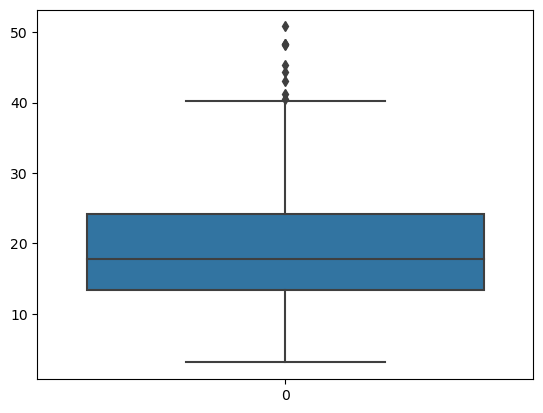

In [46]:
sns.boxplot(df['total_bill'])
plt.show()

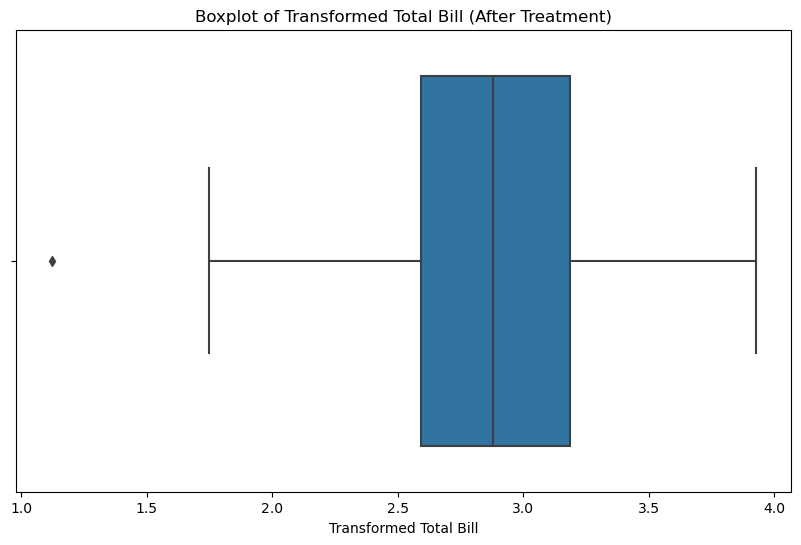

In [47]:
# Treat outliers using log transformation
df['total_bill_transformed'] = np.log(df['total_bill'])

# Plot a boxplot after treatment
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_bill_transformed', data=df)
plt.title('Boxplot of Transformed Total Bill (After Treatment)')
plt.xlabel('Transformed Total Bill')
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

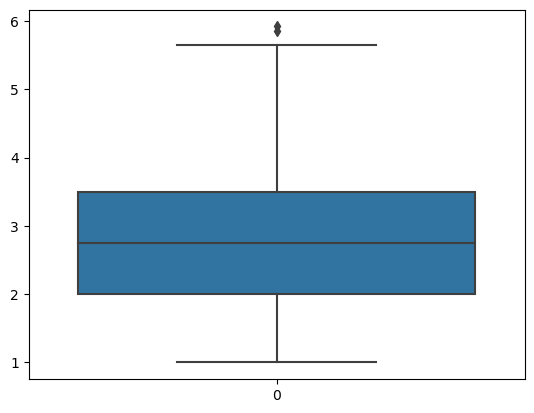

Q1: 2.0
Q3: 3.575
IQR: 1.5750000000000002
lower_bound: -0.36250000000000027
upper_bound: 5.9375
Number of outliers removed from the 'tip' column using IQR technique: 8


In [48]:
# Calculate the interquartile range (IQR)
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]

sns.boxplot(df_filtered['tip'])
plt.show()

# Print the number of outliers removed
outliers_removed = len(df) - len(df_filtered)
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)
print("Number of outliers removed from the 'tip' column using IQR technique:", outliers_removed)

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [53]:
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_transformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
142,41.19,5.00,5,3.718196,True,False,False,False,True,True
66,16.45,2.47,2,2.800325,False,False,True,False,False,False
67,3.07,1.00,1,1.121678,False,True,True,False,False,False
21,20.29,2.75,2,3.010128,False,False,True,False,False,False
192,28.44,2.56,2,3.347797,True,True,False,False,True,True


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [55]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max - tb_min
print('tb_max =', tb_max )
print('tb_min =', tb_min )
print('range_', range_)

tb_max = 50.81
tb_min = 3.07
range_ 47.74


In [59]:
mm = MinMaxScaler()
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [60]:
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_tb_max_min = tb_mm_max - tb_mm_min

print('tb_mm_max = ', tb_mm_max)
print('tb_mm_min = ', tb_mm_min)
print('range_tb_max_min =', range_tb_max_min)

tb_mm_max =  0.9999999999999999
tb_mm_min =  0.0
range_tb_max_min = 0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [61]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [63]:
tips_df = pd.get_dummies(tips_df, drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [66]:
x = tips_df.drop('tip', axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

mm = MinMaxScaler()
X_train.iloc[:, :2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:, :2] = mm.fit_transform(X_test.iloc[:,:2])


(170, 8) (74, 8)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [77]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [78]:
pred = lr.predict(X_test)

In [84]:
print('r2-score test:', r2_score(Y_test, pred))

r2-score test: 0.5309695357807166


### Happy Learning:)